In [1]:
#Importer les modules
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import mplfinance as mpf
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Agrandir les figures
plt.rcParams['figure.figsize'] = (15.0, 10.0)   
plt.rcParams['font.family'] = "serif"

In [2]:
data = yf.download('CL=F', start='2022-01-01', end='2023-05-13', interval='1h')
print(data)

[*********************100%***********************]  1 of 1 completed
                                Open       High        Low      Close  \
Datetime                                                                
2022-01-02 18:00:00-05:00  75.690002  75.930000  75.580002  75.809998   
2022-01-02 19:00:00-05:00  75.820000  76.059998  75.779999  75.900002   
2022-01-02 20:00:00-05:00  75.900002  75.970001  75.529999  75.639999   
2022-01-02 21:00:00-05:00  75.639999  75.639999  75.449997  75.489998   
2022-01-02 22:00:00-05:00  75.489998  75.879997  75.480003  75.790001   
...                              ...        ...        ...        ...   
2023-05-12 12:00:00-04:00  70.169998  70.589996  70.099998  70.129997   
2023-05-12 13:00:00-04:00  70.139999  70.370003  69.930000  70.019997   
2023-05-12 14:00:00-04:00  70.019997  70.180000  69.940002  70.089996   
2023-05-12 15:00:00-04:00  70.089996  70.180000  70.070000  70.099998   
2023-05-12 16:00:00-04:00  70.099998  70.160004  70.040

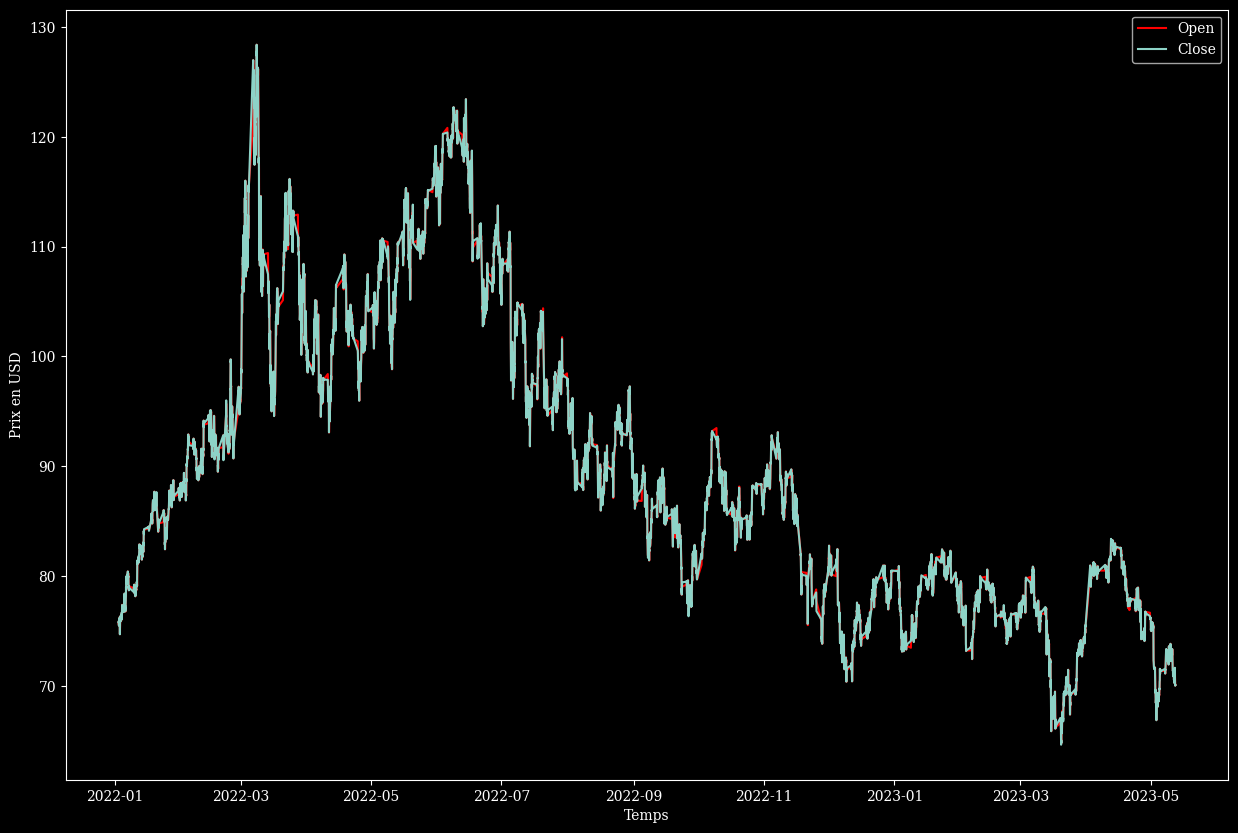

In [3]:
# Visualisation des prix Open et Close
plt.plot(data['Open'], color = 'red', label = 'Open')
plt.plot(data['Close'], label = 'Close')
plt.xlabel('Temps')
plt.ylabel("Prix en USD")
plt.legend()
plt.show()

Text(0, 0.5, 'Différence en USD')

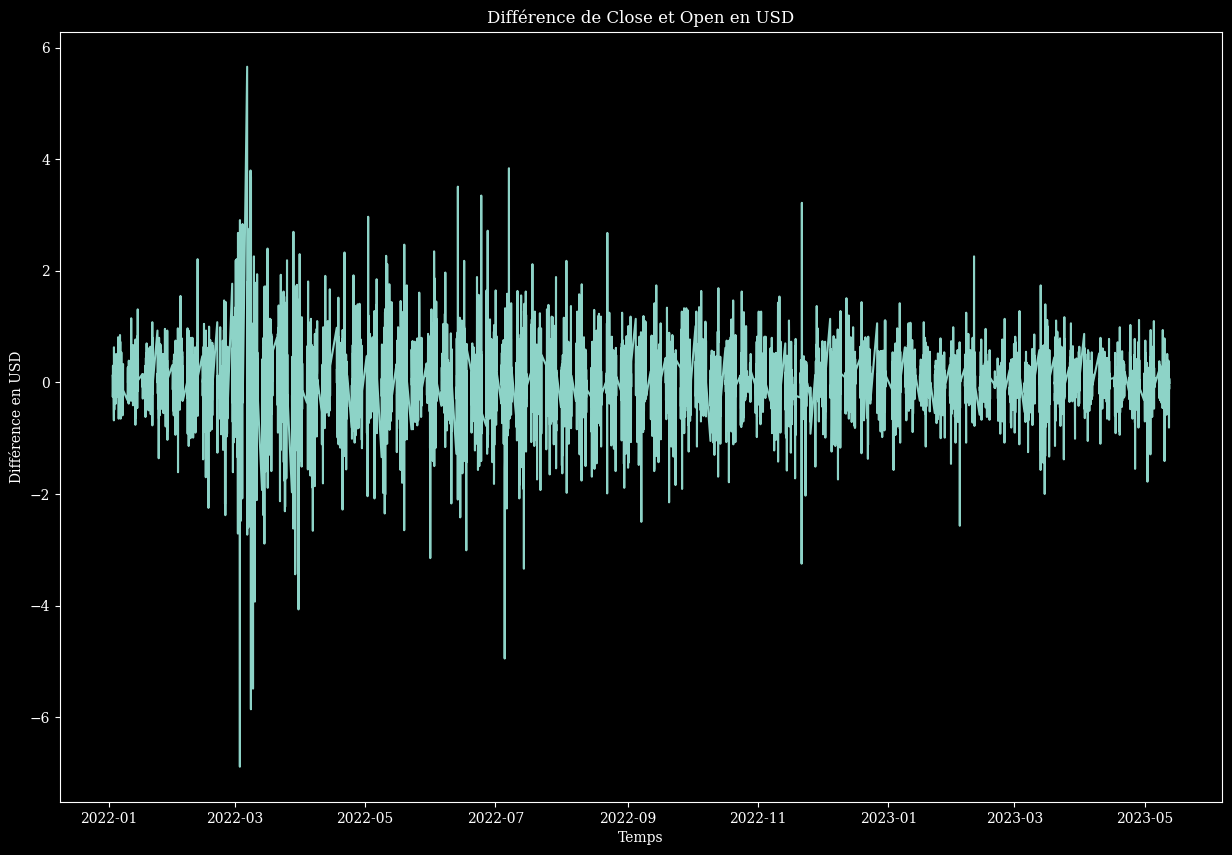

In [4]:
# Visualisation de la différence Close et Open
data ['Diff'] = data['Close'] - data['Open']
data['Diff']
plt.plot (data['Diff'])
plt.title ("Différence de Close et Open en USD")
plt.xlabel ('Temps')
plt.ylabel ('Différence en USD')

In [5]:
data [['Open', 'High','Low', 'Close']]

,Open,High,Low,Close
Datetime,,,,
2022-01-02 18:00:00-05:00,75.690002,75.930000,75.580002,75.809998
2022-01-02 19:00:00-05:00,75.820000,76.059998,75.779999,75.900002
2022-01-02 20:00:00-05:00,75.900002,75.970001,75.529999,75.639999
2022-01-02 21:00:00-05:00,75.639999,75.639999,75.449997,75.489998
2022-01-02 22:00:00-05:00,75.489998,75.879997,75.480003,75.790001
...,...,...,...,...
2023-05-12 12:00:00-04:00,70.169998,70.589996,70.099998,70.129997
2023-05-12 13:00:00-04:00,70.139999,70.370003,69.930000,70.019997
2023-05-12 14:00:00-04:00,70.019997,70.180000,69.940002,70.089996


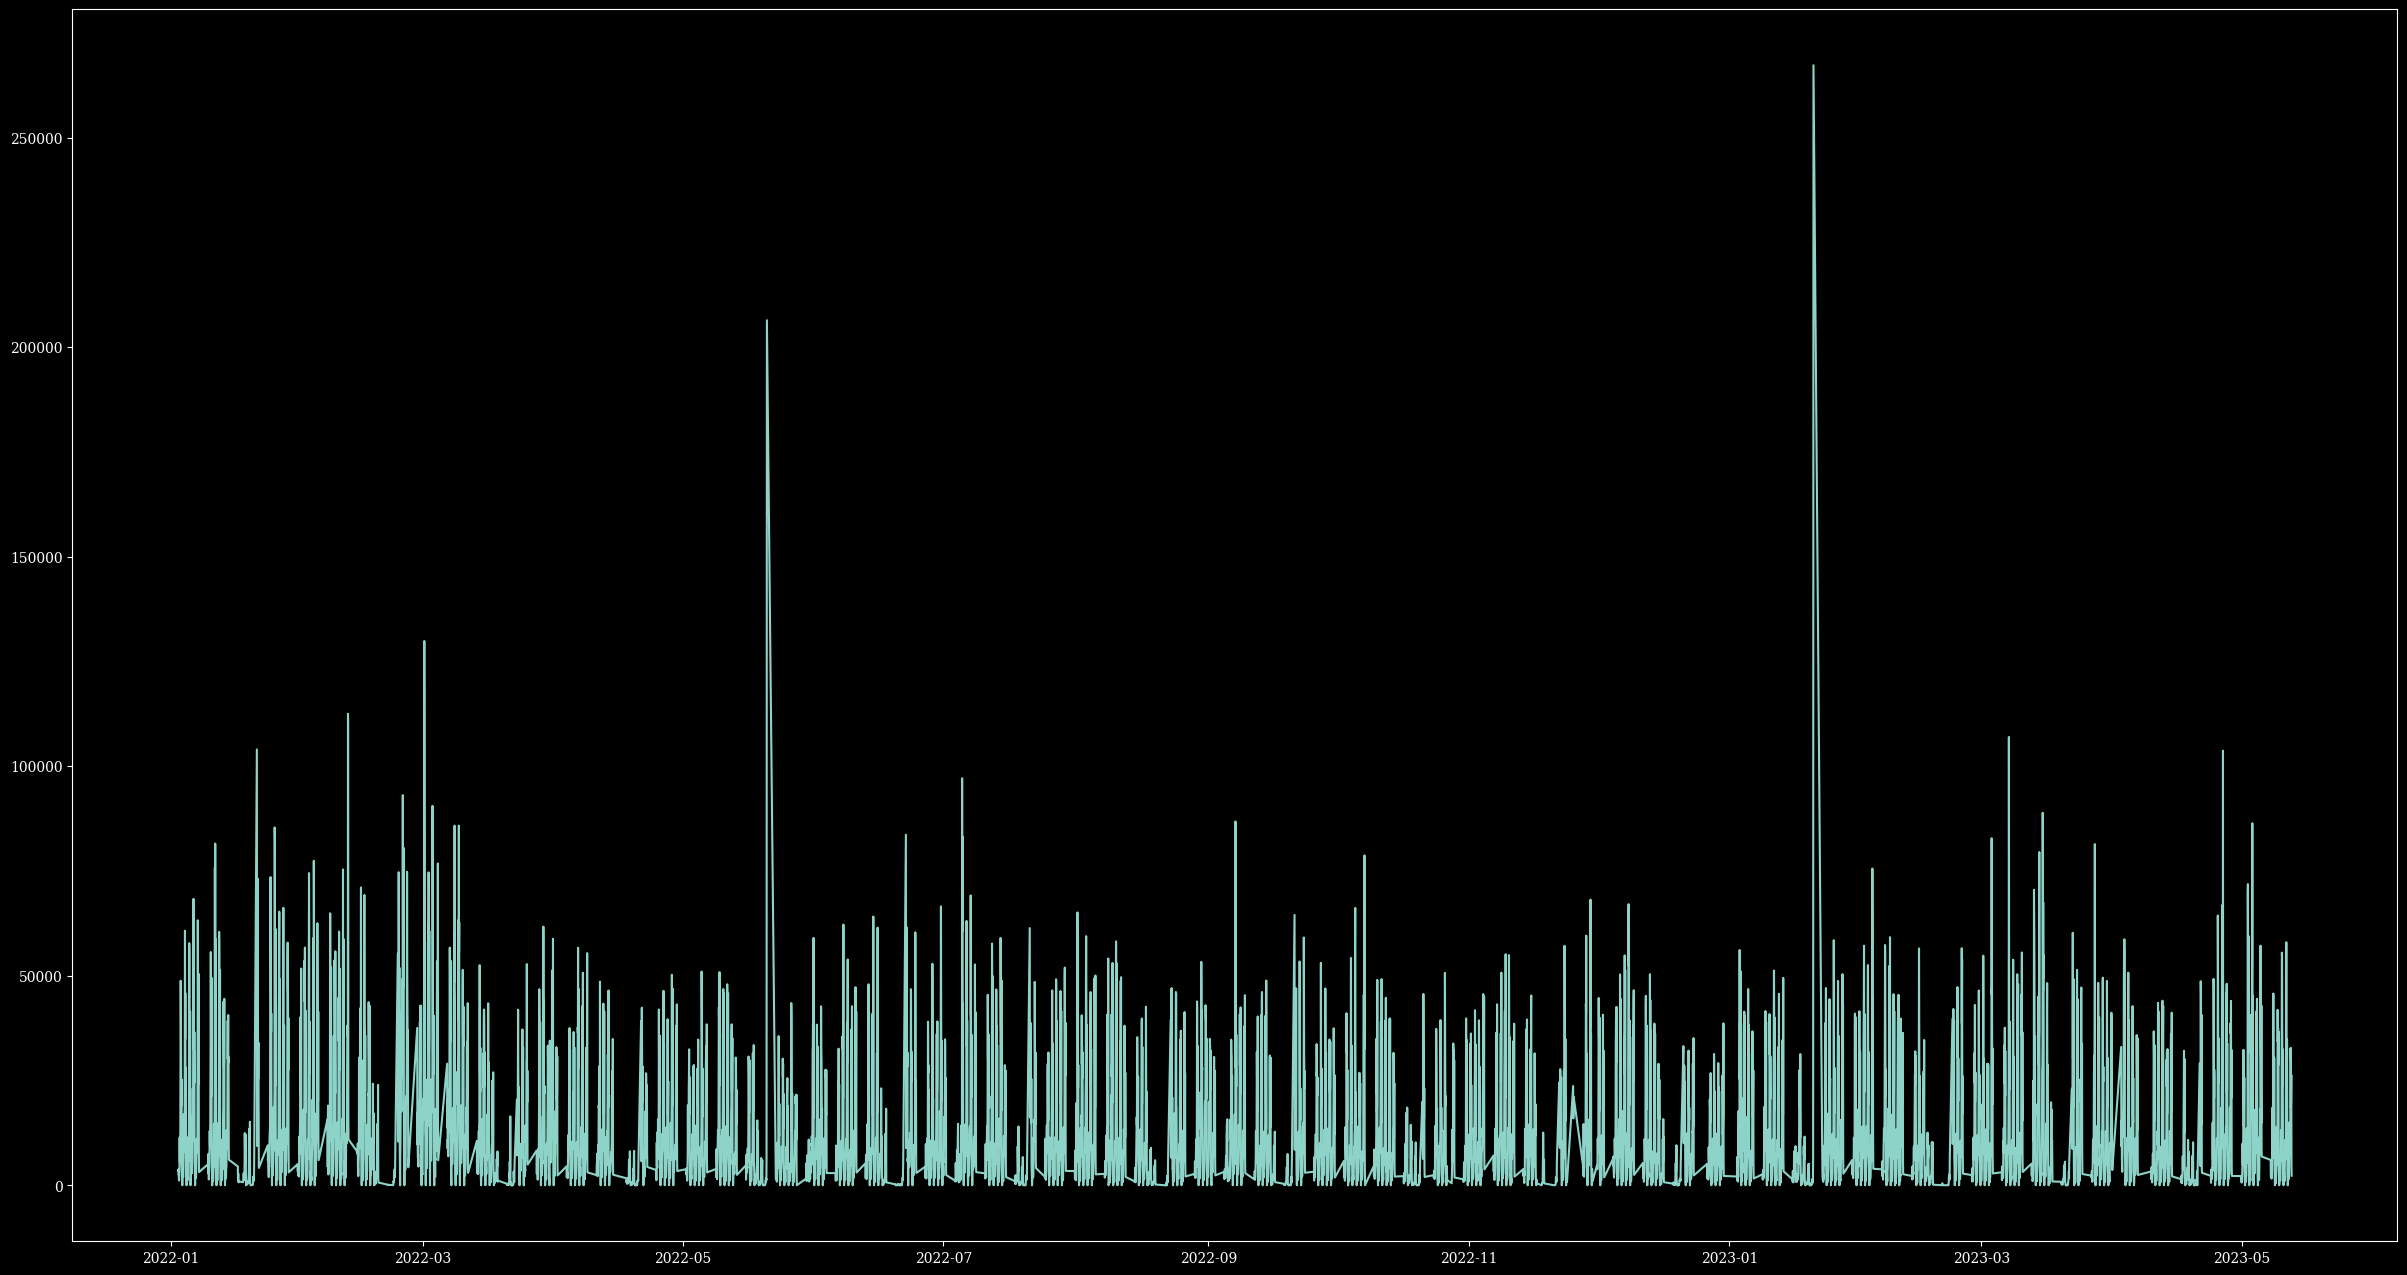

In [6]:
#Agrandir les figures
plt.rcParams['figure.figsize'] = (30.0, 16.0)   
plt.rcParams['font.family'] = "serif"
# Visualisation du volume des transactions 
plt.plot(data['Volume'])
plt.show()

2 jours où le volume des transactions était très important

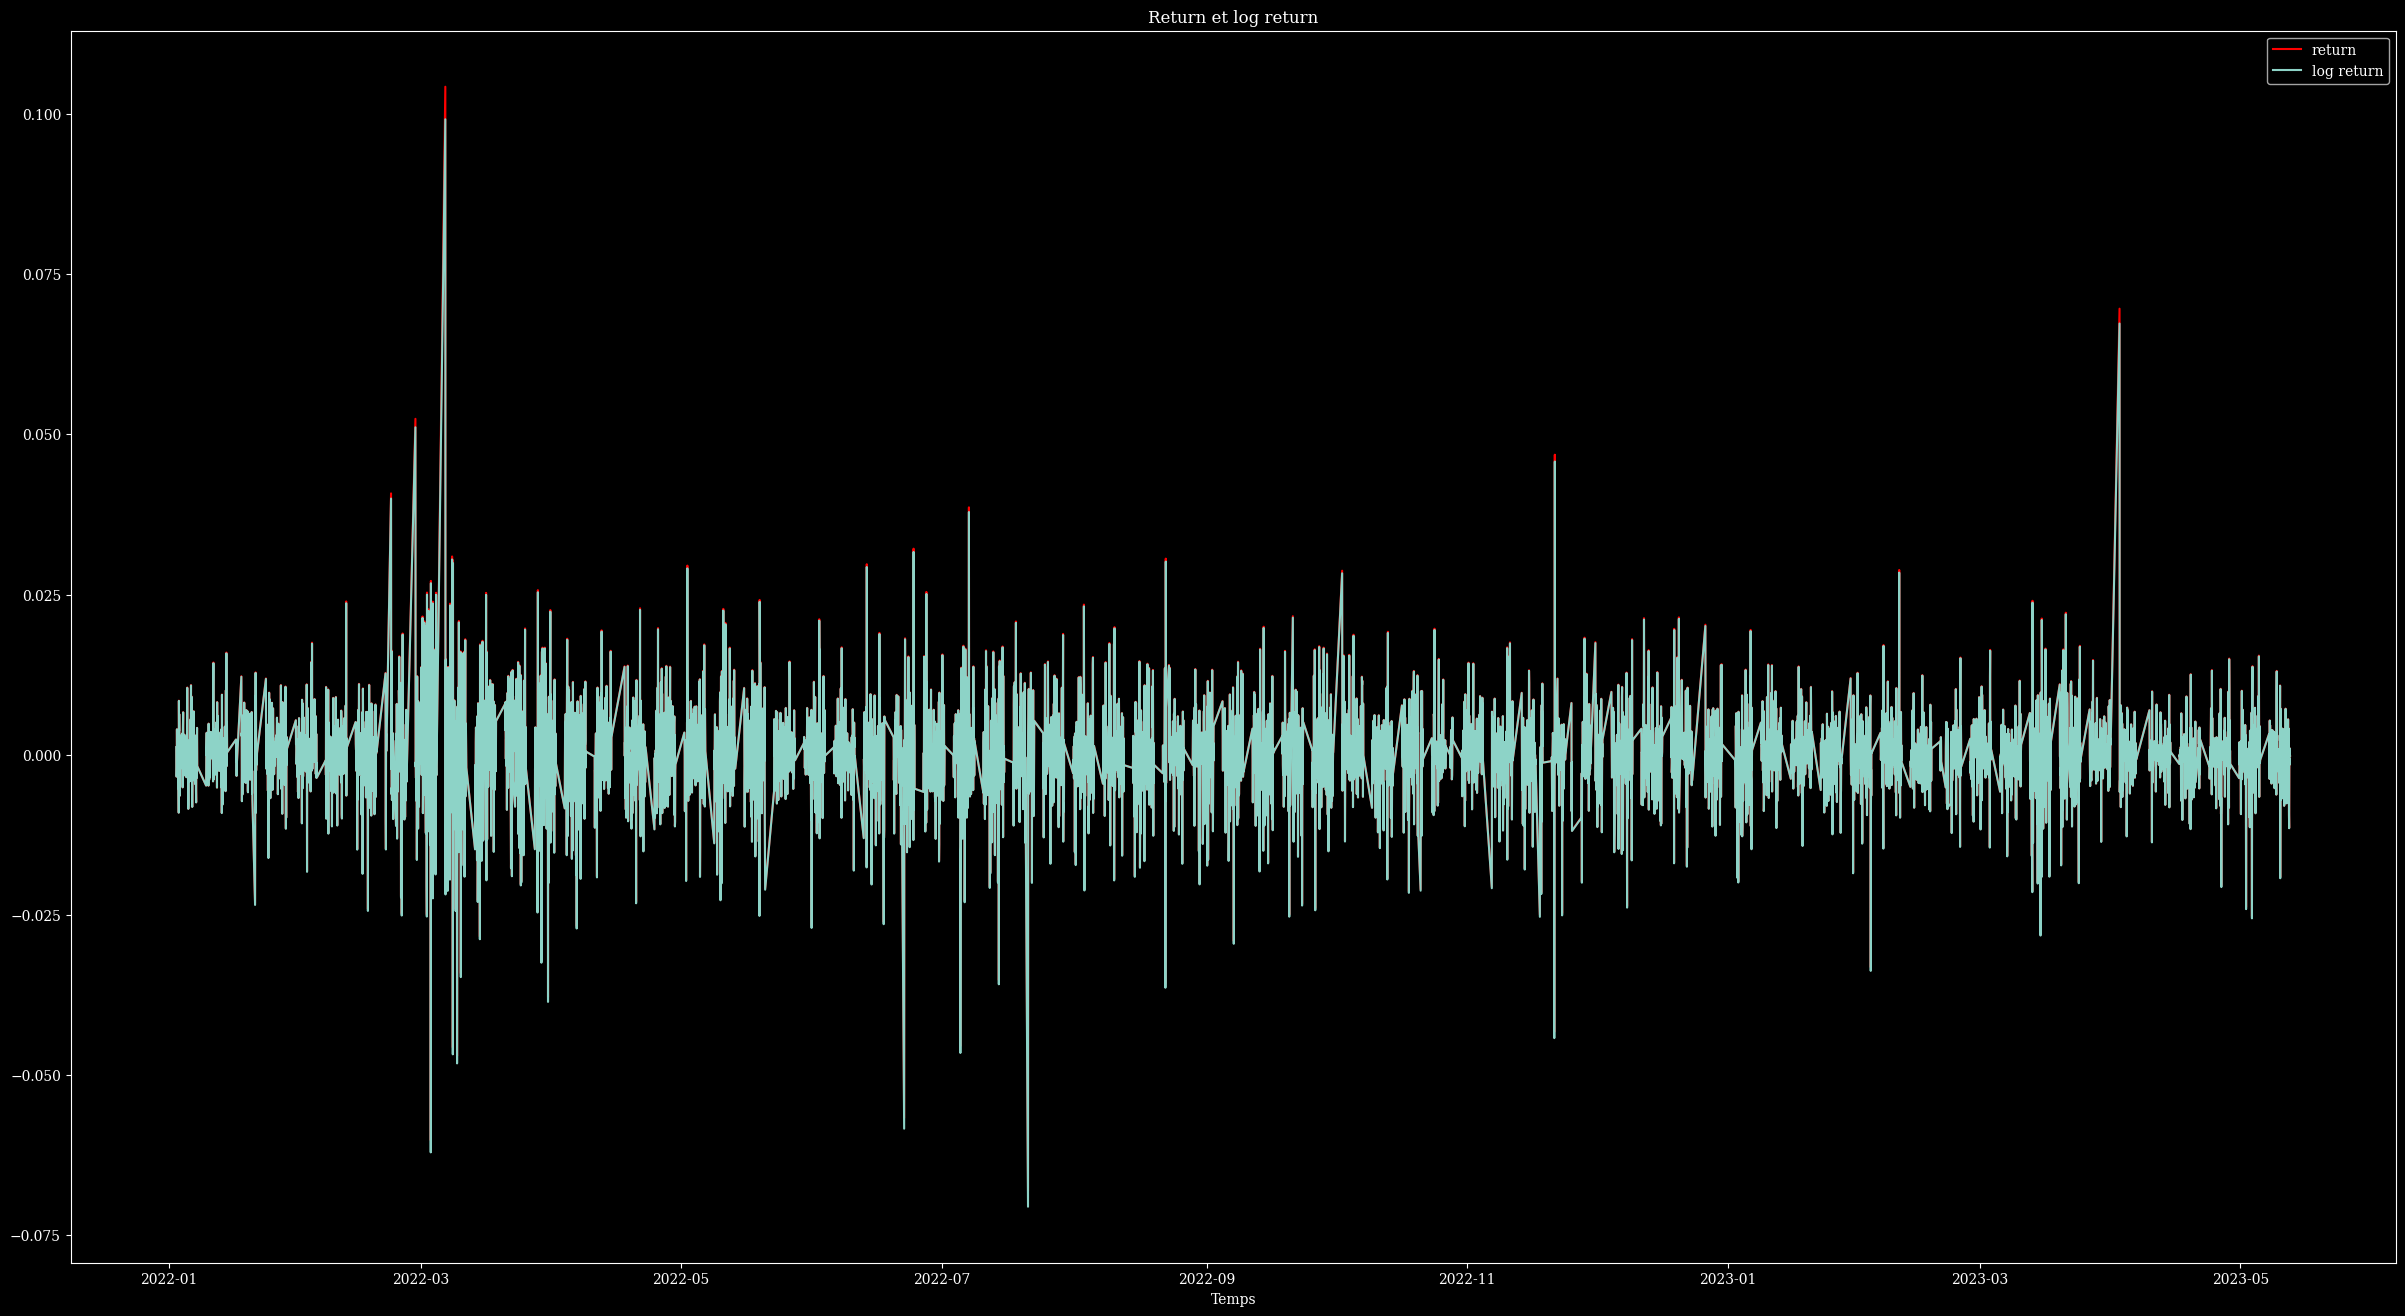

In [7]:
# Return et log-return
data['return'] = data['Close'].pct_change()
data['log return'] = np.log(data['return'] + 1)

# Visualisation du return et du log return
plt.plot(data['return'], color = 'red' ,label = 'return')
plt.plot(data['log return'], label = 'log return')
plt.legend()
plt.xlabel("Temps")
plt.title ("Return et log return")
plt.show()


In [8]:
# Volatilité 
volatilité = data['Close'].std()
print('La volatilité est ' + str(volatilité))

La volatilité est 13.587301806756667


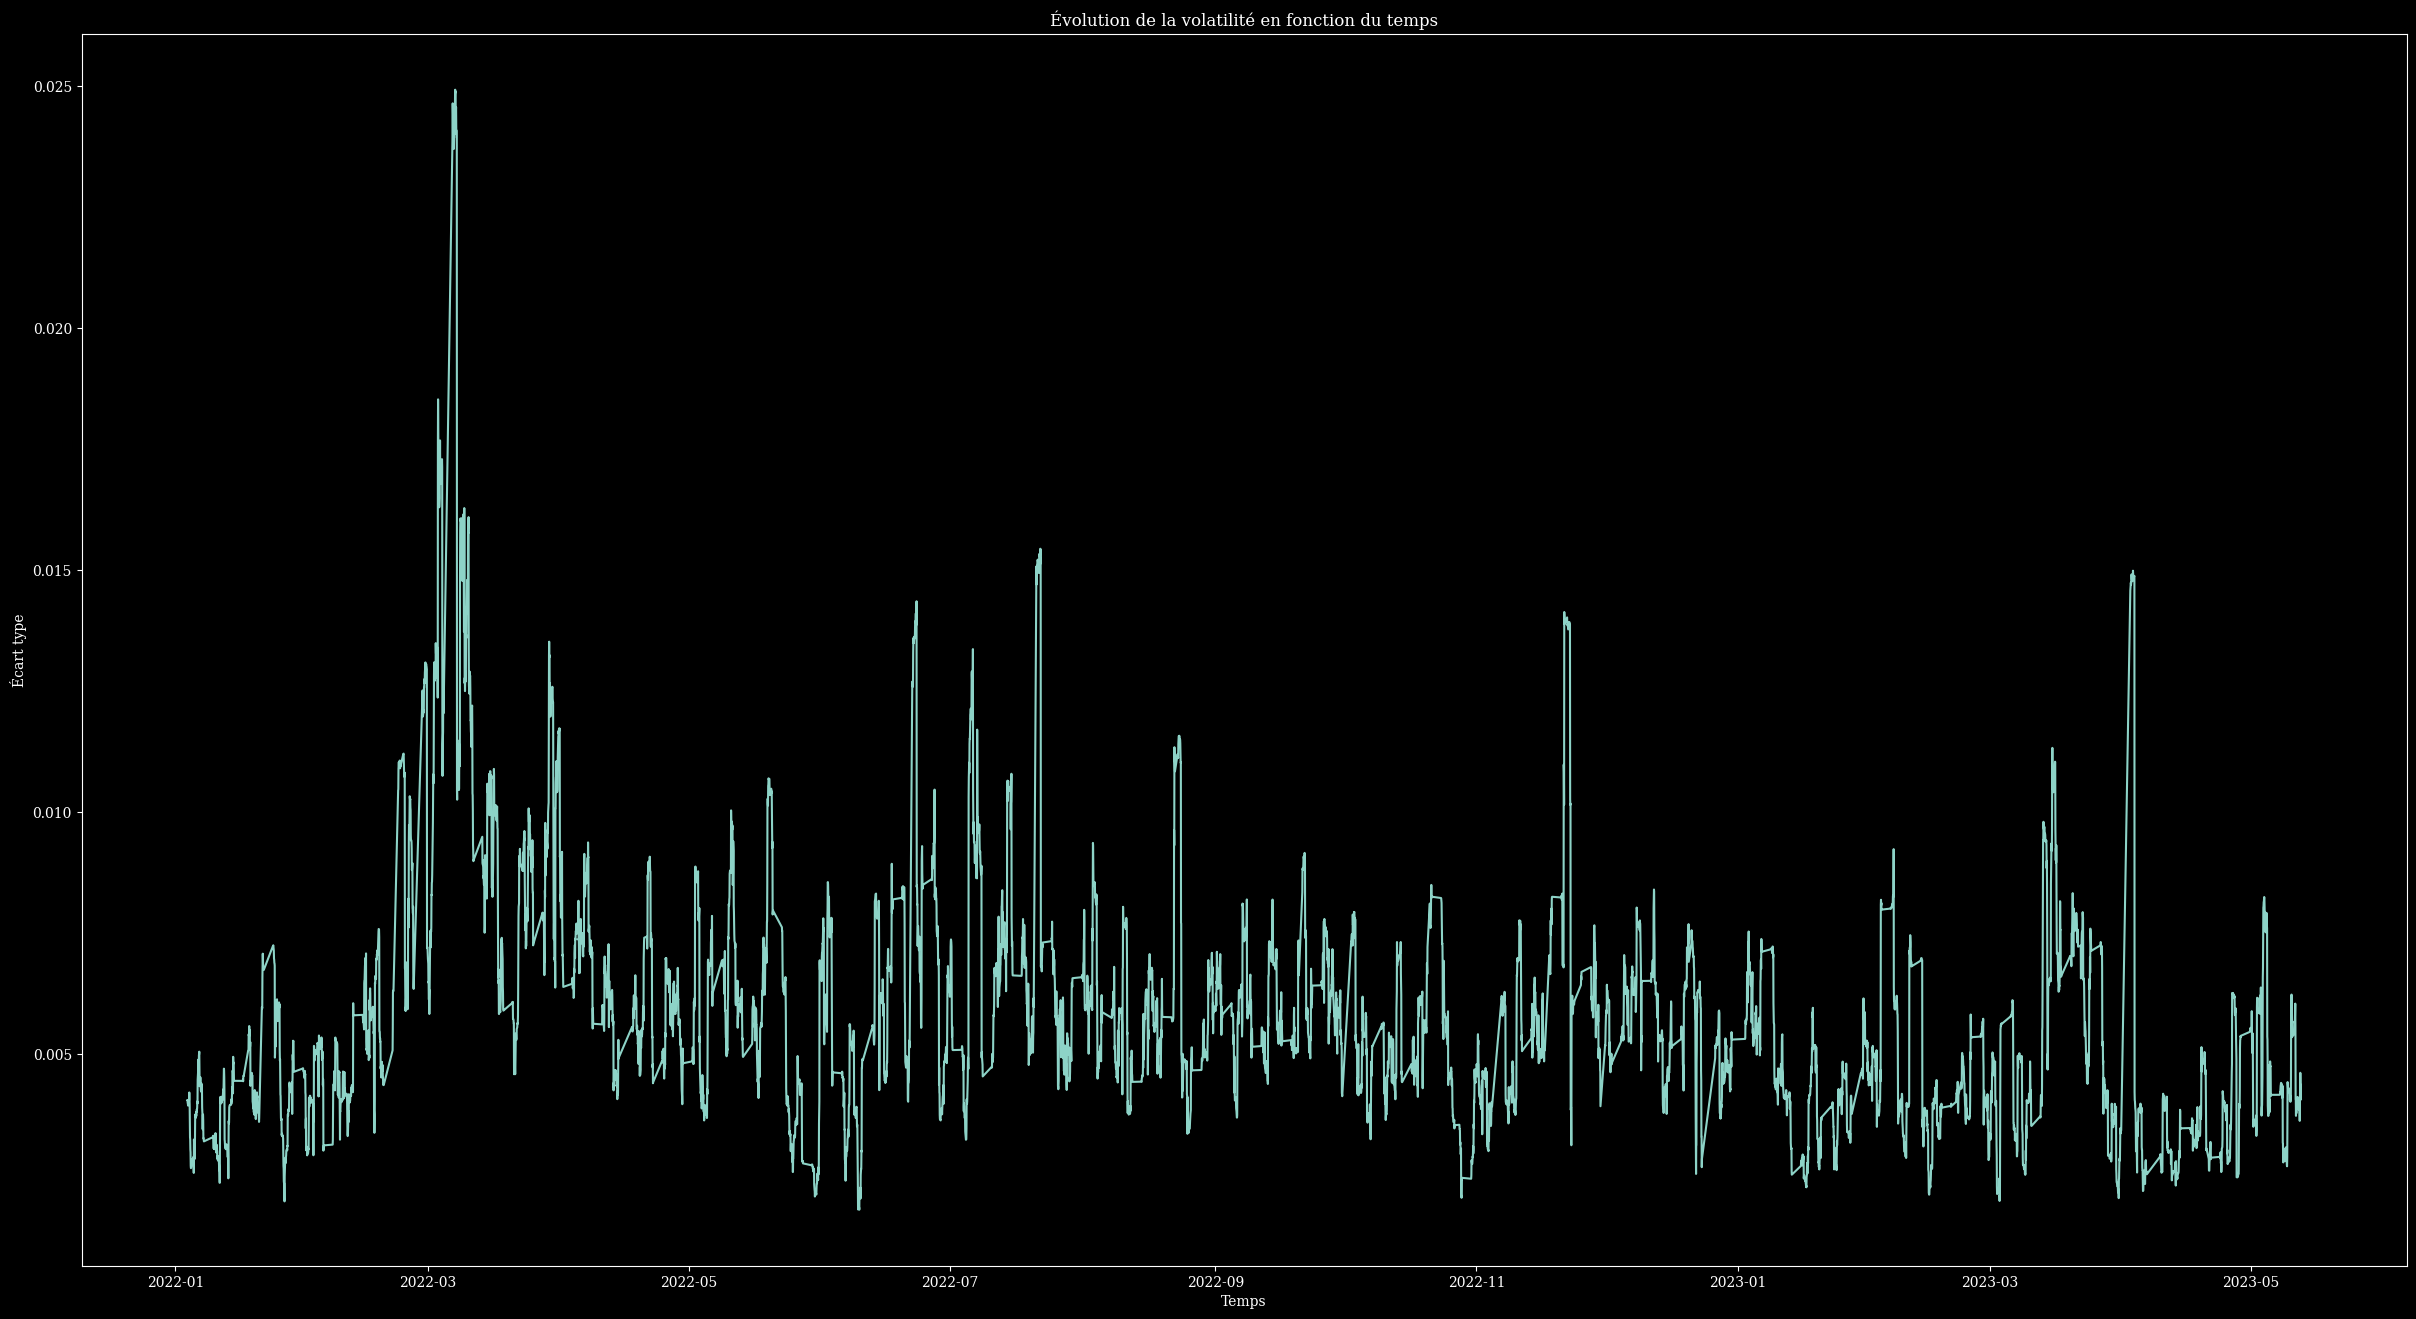

In [9]:
volatility = data['return'].rolling(window=24).std()  # Calcul de l'écart type sur une fenêtre de 24 périodes (heures)

# Tracer l'écart type en fonction du temps
plt.plot(data.index, volatility)
plt.xlabel('Temps')
plt.ylabel("Écart type")
plt.title("Évolution de la volatilité en fonction du temps")
plt.show()